In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [12]:
df = pd.read_csv('Loan_Details.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26560 entries, 0 to 26559
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   loan_key                      26560 non-null  int64  
 1   is_current                    26560 non-null  bool   
 2   start_date                    26560 non-null  object 
 3   end_date                      0 non-null      float64
 4   entity_code                   26560 non-null  object 
 5   branch_key                    26560 non-null  int64  
 6   currency_code                 26560 non-null  object 
 7   refinanced                    26560 non-null  bool   
 8   rebuild_no                    26560 non-null  int64  
 9   previous_contract_number      105 non-null    float64
 10  product_key                   25519 non-null  object 
 11  interest_rate                 26560 non-null  float64
 12  grace_period                  26560 non-null  int64  
 13  d

In [19]:
df['disbursment_date'] = pd.to_datetime(df['disbursment_dateid'])
df['disbursment_date'].dt.month.max()

np.int32(1)

### Loan Dataset Column Descriptions

| Column Name                   | Meaning (Layman Explanation)                                                                 |
|-------------------------------|--------------------------------------------------------------------------------------------|
| `loan_key`                    | Unique ID for each loan – like a serial number.                                            |
| `is_current`                  | Is the loan still active? (`true` or `false`).                                             |
| `start_date`                  | When the loan officially started.                                                          |
| `end_date`                    | When the loan ended (if ended). May be blank if loan is still running.                     |
| `entity_code`                 | Code for the main entity (e.g., the institution handling the loan).                        |
| `branch_key`                  | Branch code – which physical office gave the loan.                                         |
| `currency_code`               | Currency type (e.g., USD, EUR).                                                           |
| `refinanced`                  | Was this loan refinanced from an earlier loan? (`true` or `false`)                         |
| `rebuild_no`                  | Number of times this loan has been rebuilt or restructured.                                |
| `previous_contract_number`    | If refinanced, shows the original loan number.                                             |
| `product_key`                 | Type of loan product (e.g., LOAN_MICRO).                                                  |
| `interest_rate`               | Interest rate charged on the loan (e.g., 18%).                                            |
| `grace_period`                | Months where no payment is needed initially.                                               |
| `disbursment_dateid`          | When the money was given to the customer (format: `20140425` = 25-Apr-2014).              |
| `principal_amount`            | Loan amount given (raw value).                                                            |
| `interest_planned_amount`     | How much interest the customer is expected to pay in total.                                |
| `principal_amount_lccy`       | Principal in local currency.                                                              |
| `interest_planned_amount_lccy`| Interest in local currency.                                                               |
| `principal_amount_eur`        | Principal converted to EUR (used for your KPI analysis).                                   |
| `interest_planned_amount_eur` | Interest converted to EUR.                                                                |
| `maturity_dateid`             | Expected end date of the loan.                                                            |
| `loan_term`                   | Duration of the loan (in months).                                                         |
| `modification_dateid`         | Date when loan details were last changed.                                                 |
| `modification_timestamp`      | Exact timestamp of last change.                                                           |
| `loan_officer_user_code`      | Code of the officer who handled this loan (important for your 2nd task).                  |



In [13]:
# ---------------------------------------------------------------------------------
# Problem Statement:
# Analyze loan disbursement data to visualize the sum of principal amounts (in EUR)
# disbursed over the last 6 months, grouped by month. The goal is to understand
# monthly trends in loan disbursement amounts.
# ---------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Convert disbursment_dateid to datetime for easier filtering and grouping
df['disbursment_date'] = pd.to_datetime(df['disbursment_dateid'], format='%Y%m%d')
df['disbursment_date'] 


0       2014-04-25
1       2014-04-25
2       2014-04-30
3       2014-04-24
4       2014-04-25
           ...    
26555   2020-03-05
26556   2019-10-07
26557   2019-11-29
26558   2020-05-08
26559   2020-06-23
Name: disbursment_date, Length: 26560, dtype: datetime64[ns]

2020-07-23 00:00:00
  disbursment_date  principal_amount_eur
0          2020-01             635064.41
1          2020-02             768397.11
2          2020-03             249138.59
3          2020-04               4333.69
4          2020-05              24891.52
5          2020-06             728847.40
6          2020-07             695384.70


C:\Users\Acer\AppData\Local\Temp\ipykernel_15840\2675611006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['six_month_ago'] = filtered_df['disbursment_date'].dt.to_period('M')


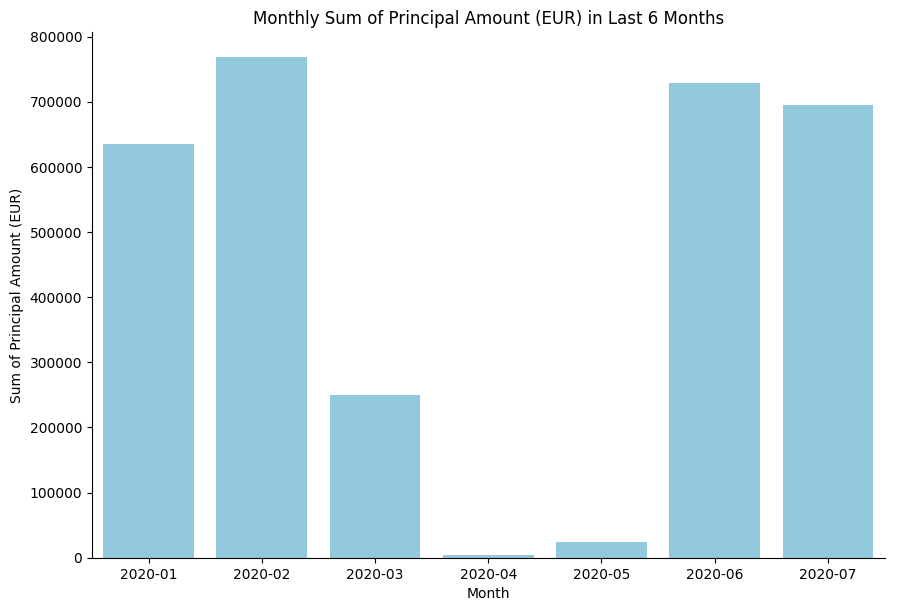

,six_month_ago,principal_amount_eur
0,2020-01,635064.41
1,2020-02,768397.11
2,2020-03,249138.59
3,2020-04,4333.69
4,2020-05,24891.52
5,2020-06,728847.40
6,2020-07,695384.70


In [ ]:
# Find the latest disbursement date in the data
max_date = df['disbursment_date'].max()
print(max_date)


# Calculate the date 6 months before the 
# t date
six_month_ago = max_date - pd.DateOffset(months=6)

# Filter the DataFrame to only include loans disbursed in the last 6 months
filtered_df = df[df['disbursment_date'] >= six_month_ago]
# Create a new column for the month and year of disbursement (for grouping)
filtered_df['six_month_ago'] = filtered_df['disbursment_date'].dt.to_period('M')

# Group the filtered data by month and sum the principal_amount_eur for each month
monthly_sum = filtered_df.groupby(filtered_df['disbursment_date'].dt.to_period('M'))['principal_amount_eur'].sum().reset_index()
# Sort the DataFrame by month to ensure bars are in chronological order
monthly_sum = monthly_sum.sort_values('disbursment_date')

print(monthly_sum)  # Display the monthly sums for verification

# Plot a bar chart showing the sum of principal amounts per month
sns.catplot(
    data=monthly_sum,
    x='disbursment_date',
    y='principal_amount_eur',
    kind='bar',
    height=6,
    aspect=1.5,
    color='skyblue',
    order=monthly_sum['disbursment_date'].astype(str)  # Ensure correct order on x-axis
)
plt.ylabel('Sum of Principal Amount (EUR)')
plt.xlabel('Month')
plt.title('Monthly Sum of Principal Amount (EUR) in Last 6 Months')
plt.show()

# (Optional) Another way to get the same grouped data for further analysis
sum_df = filtered_df.groupby('six_month_ago')['principal_amount_eur'].sum().reset_index()
sum_df  # Display the grouped sum DataFrame

In [22]:
# 2. Disbursements per Loan Officer (Last Month)
df['disbursment_date'] = pd.to_datetime(df['disbursment_dateid'], format='%Y%m%d')
last_month = df['disbursment_date'].dt.to_period('D').max()
print(last_month)


2020-07-23


   loan_officer_user_code  principal_amount_eur
53                   PAMA              56888.99
51                   NAUM              54789.49
27                   FIUW              53753.18
37                   JOUM              40186.41
19                   EMBE              31490.89
..                    ...                   ...
44                   MANS               1405.72
59                   UMGE                985.94
33                   JAUW                796.26
60                   VASI                443.72
30                   GIKA                373.49

[63 rows x 2 columns]


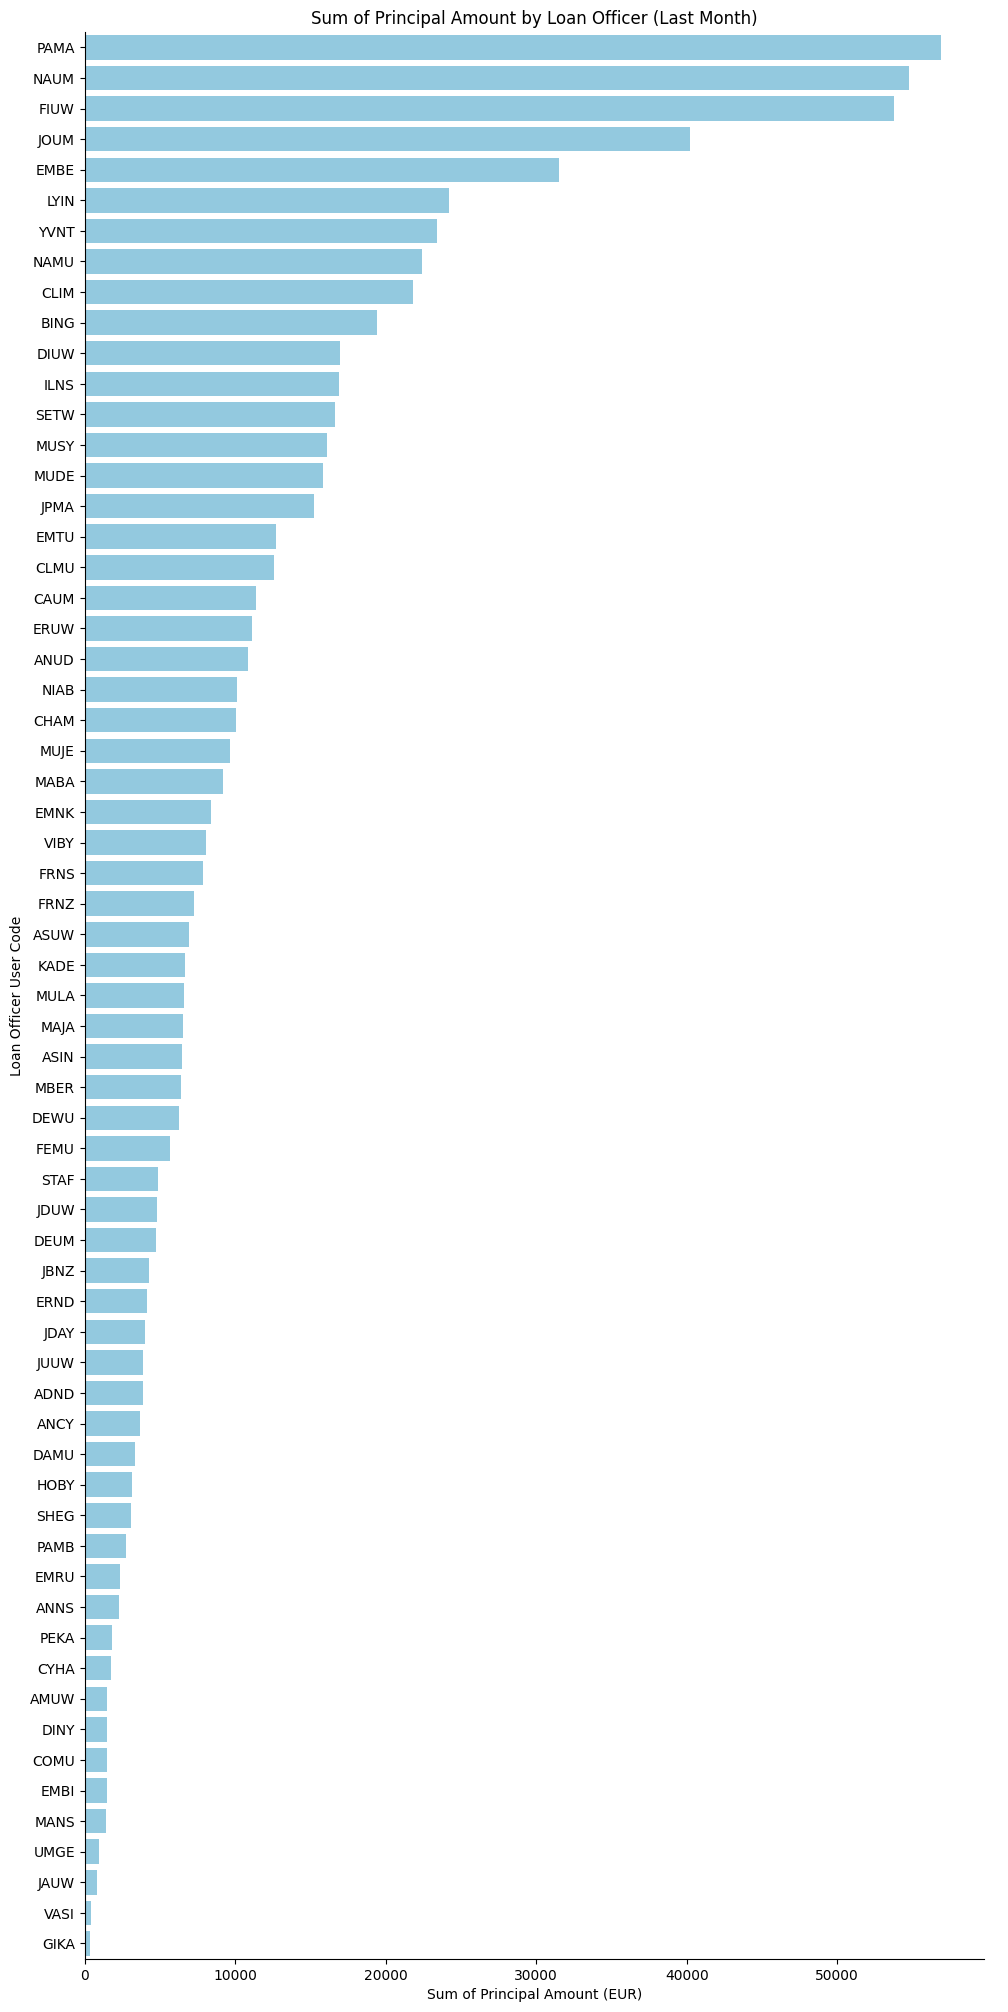

In [68]:

last_month_df = df[df['disbursment_date'].dt.to_period('M') == last_month]
last_month_principal = last_month_df['principal_amount_eur'].groupby(last_month_df['loan_officer_user_code']).sum().reset_index() .sort_values('principal_amount_eur', ascending=False)
print(last_month_principal)  # Display the last month's principal amounts for verification
sns.catplot(
    data=last_month_principal,
    y='loan_officer_user_code',
    x='principal_amount_eur',
    kind='bar',
    height=20,
    aspect=0.5,
    color='skyblue',
)
plt.xlabel('Sum of Principal Amount (EUR)')  # x-axis label
plt.ylabel('Loan Officer User Code')         # y-axis label
plt.title('Sum of Principal Amount by Loan Officer (Last Month)')  # Title
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                       
df2 = pd.read_csv('Loans.csv')  # Reload the original DataFrame if needed
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20931 entries, 0 to 20930
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   loan_snap_key                      20931 non-null  int64  
 1   is_current                         20931 non-null  bool   
 2   start_date                         20931 non-null  object 
 3   end_date                           0 non-null      float64
 4   entity_code                        20931 non-null  object 
 5   loan_key                           20931 non-null  int64  
 6   business_dateid                    20931 non-null  int64  
 7   loan_status_key                    20931 non-null  object 
 8   loan_substatus_key                 20931 non-null  object 
 9   currency_code                      20931 non-null  object 
 10  principal_amount                   20931 non-null  float64
 11  principal_amount_paid              20931 non-null  flo

In [ ]:
# 

### Loans.csv (df2) Column Descriptions

| Column Name                           | Description (Layman Explanation)                                      |
|---------------------------------------|----------------------------------------------------------------------|
| loan_snap_key                         | Unique snapshot ID for each loan record.                             |
| is_current                            | Is the loan currently active? (`True` or `False`).                   |
| start_date                            | When the loan officially started.                                    |
| end_date                              | When the loan ended (if ended). May be blank if still running.       |
| entity_code                           | Code for the main entity (e.g., the institution handling the loan).  |
| loan_key                              | Unique ID for each loan.                                             |
| business_dateid                       | Business date for the record (format: `YYYYMMDD`).                   |
| loan_status_key                       | Status of the loan (e.g., active, closed).                           |
| loan_substatus_key                    | Sub-status of the loan.                                              |
| currency_code                         | Currency type (e.g., USD, EUR).                                      |
| principal_amount                      | Original principal amount of the loan.                               |
| principal_amount_paid                 | Amount of principal paid so far.                                     |
| principal_amount_outstanding          | Principal amount still outstanding.                                  |
| interest_amount_planned               | Total interest expected to be paid.                                  |
| interest_amount_paid                  | Interest paid so far.                                                |
| interest_amount_accrued               | Interest accrued so far.                                             |
| penalty_amount                        | Total penalty amount charged.                                        |
| penalty_amount_paid                   | Penalty amount paid so far.                                          |
| penalty_amount_waived                 | Penalty amount waived.                                               |
| charge_amount                         | Total charges applied.                                               |
| charge_amount_paid                    | Charges paid so far.                                                 |
| principal_amount_lccy                 | Principal in local currency.                                         |
| principal_amount_paid_lccy            | Principal paid in local currency.                                    |
| principal_amount_outstanding_lccy     | Principal outstanding in local currency.                             |
| interest_amount_planned_lccy          | Planned interest in local currency.                                  |
| interest_amount_paid_lccy             | Interest paid in local currency.                                     |
| interest_amount_accrued_lccy          | Interest accrued in local currency.                                  |
| penalty_amount_lccy                   | Penalty in local currency.                                           |
| penalty_amount_paid_lccy              | Penalty paid in local currency.                                      |
| penalty_amount_waived_lccy            | Penalty waived in local currency.                                    |
| charge_amount_lccy                    | Charges in local currency.                                           |
| charge_amount_paid_lccy               | Charges paid in local currency.                                      |
| principal_amount_eur                  | Principal in EUR.                                                    |
| principal_amount_paid_eur             | Principal paid in EUR.                                               |
| principal_amount_outstanding_eur      | Principal outstanding in EUR.                                        |
| interest_amount_planned_eur           | Planned interest in EUR.                                             |
| interest_amount_paid_eur              | Interest paid in EUR.                                                |
| interest_amount_accrued_eur           | Interest accrued in EUR.                                             |
| penalty_amount_eur                    | Penalty in EUR.                                                      |
| penalty_amount_paid_eur               | Penalty paid in EUR.                                                 |
| penalty_amount_waived_eur             | Penalty waived in EUR.                                               |
| charge_amount_eur                     | Charges in EUR.                                                      |
| charge_amount_paid_eur                | Charges paid in EUR.                                                 |
| overdue_days                          | Number of days overdue.                                              |
| overdue_days_max                      | Maximum number of days overdue.                                      |
| finish_dateid                         | Date when the loan was finished (format: `YYYYMMDD`).                |
| last_repayment_dateid                 | Date of last repayment (format: `YYYYMMDD`).                         |
| write_off_dateid                      | Date when the loan was written off (format: `YYYYMMDD`).             |
| fx_date                               | Date of the FX rate used for currency conversion.                    |

In [6]:
# Portfolio at Risk (PAR) >30 Analysis

# Step 1: Filter only active loans
active_loans = df2[df2['is_current'] == True]

# Step 2: Filter loans with overdue > 30 days
par30_loans = active_loans[active_loans['overdue_days'] > 30]

# Step 3: Calculate total outstanding amount at risk
par30_value = par30_loans['principal_amount_outstanding_eur'].sum()
print(f'Total Portfolio at Risk (PAR) >30 days: {par30_value:.2f} EUR')

Total Portfolio at Risk (PAR) >30 days: 4063357.74 EUR
